# Análise de Dados do ENEM Edições 2017, 2018 e 2019
### Parte 1

**Feito por Lucas Lopes - 02/03/2022**

---

<img src="https://imagens.ebc.com.br/6BdfhgUhqiILyXdv34gQTB6_zts=/1100x370/smart/https://memoria.ebc.com.br/sites/_portalebc2014/files/atoms_image/logo_enem.jpg" alt="Drawing" style="width: 80%;"/>

---

## Descrição do Problema

O Exame Nacional do Ensino Médio (Enem) foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Em 2009, o exame aperfeiçoou sua metodologia e passou a ser utilizado como mecanismo de acesso à educação superior.
Esta análise tem por objetivo fornecer insigths sobre os os microdados do enem bem como sobre os participantes e os estados brasileiros.
___

### Pergunta 1 - Quais dados (arquivos) utilizados, onde e como foram obtidos?
---

### Dados Utilizados na Análise  <br>

Os dados utilizados nesta análise ocupam mais de 13 GB de espaço em memória, portanto não é possível disponibilizá-los pelo GitHub.<br>
Vocé precisará acessar os links abaixo para baixar os arquivos.<br>

<div style="float:left">
<div style="float:left;width:400px;height:400px;padding-left:20px;padding-right:50px;border-right:solid #C0C0C0 1px"><a src='https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar'>Microdados do ENEM</a> edições 2017, 2018 e 2019 e dados do Censo Escolar disponibilizados pelo INEP.<br><br><img src='https://upload.wikimedia.org/wikipedia/commons/8/83/INEP_logo_01.png'>
</div><br><br>    
<div style="float:right;width:400px;height:400px;padding-left:50px;">Dados de coordenadas das estruturas geográficas do Brasil disponibilizadas na plataforma <a src='https://www.kaggle.com/thiagobodruk/brazil-geojson/version/1'> GeoJS<a/>.<br><img src='https://camo.githubusercontent.com/eb82845351f8d87d73a714772840aaae40e3c881fccb75292d78b9585904dfb5/68747470733a2f2f6f70656e67656f736369656e63652e6769746875622e696f2f67656f6a732f696d616765732f6c6f676f5f3235362e706e67' style="width:300px;height:150px;padding-top:10px;">
</div>
</div>
   
  ### Tecnologias Utilizadas <br>
  ___
  * Linguagem Python versão 3.9.10 

  * SQL (querys simples com joins entre tabelas)

---

#### Importando as bibliotecas para análise de dados

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

Os arquivos com os microdados do ENEM, para cada ano, possuem cerca de 3 a 4 GB de tamanho, o que torna sua manipulação complexa
em termos de tempo de processamento. Para contornar esta limitação, foram carregadas somente as 
colunas com as quais iremos trabalhar, reduzindo, assim, o tempo de processamento.
Os dados a serem utilizados foram obtidos do [portal do Inep](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

In [5]:
# Importando os dados da edição ENEM 2017

dados_enem_2017 = pd.read_csv('DADOS/MICRODADOS_ENEM_2017.csv', sep=';', encoding='ISO-8859-1',
                         usecols = ['NU_INSCRICAO', 'NU_ANO','NO_MUNICIPIO_RESIDENCIA',
                                    'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO',
                                    'NO_MUNICIPIO_ESC', 'CO_ESCOLA','SG_UF_ESC',
                                    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                                    'NU_NOTA_MT','NU_NOTA_REDACAO', 'Q006'])

# Importando os dados da edição ENEM 2018

dados_enem_2018 = pd.read_csv('DADOS/MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1',
                         usecols = ['NU_INSCRICAO', 'NU_ANO','NO_MUNICIPIO_RESIDENCIA',
                                    'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO',
                                    'NO_MUNICIPIO_ESC', 'CO_ESCOLA','SG_UF_ESC',
                                    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                                    'NU_NOTA_MT','NU_NOTA_REDACAO', 'Q006'])

# Importando os dados da edição ENEM 2019

dados_enem_2019 = pd.read_csv('DADOS/MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1',
                         usecols = ['NU_INSCRICAO', 'NU_ANO','NO_MUNICIPIO_RESIDENCIA',
                                    'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO',
                                    'NO_MUNICIPIO_ESC', 'CO_ESCOLA','SG_UF_ESC',
                                    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                                    'NU_NOTA_MT','NU_NOTA_REDACAO', 'Q006'])


Concatenando as tabelas das edições 2017, 2018 e 2019 em apenas uma tabela.

In [6]:
frame = [dados_enem_2017, dados_enem_2018, dados_enem_2019]
dados_enem = pd.concat(frame, ignore_index = True)

Salvando a tabela gerada pela união dos dados de 2017, 2018 e 2019 em formato csv.

In [7]:
dados_enem.to_csv('DADOS/dados_enem_2017_ate_2019.csv',sep=';', encoding='ISO-8859-1')

Limpando as variáveis utilizadas para liberar a carga da memória RAM

In [8]:
del(dados_enem, dados_enem_2017, dados_enem_2018, dados_enem_2019)

Importando o arquivo gerado com as edições do ENEM de 2017 até 2019.

In [9]:
dados_enem = pd.read_csv('DADOS/dados_enem_2017_ate_2019.csv',sep=';', encoding='ISO-8859-1')

Verificando a quantidade de espaço que o conjunto de dados ocupa na memória RAM e os tipos dos dados

In [10]:
dados_enem.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17340358 entries, 0 to 17340357
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   NU_INSCRICAO             int64  
 2   NU_ANO                   int64  
 3   NO_MUNICIPIO_RESIDENCIA  object 
 4   NO_MUNICIPIO_NASCIMENTO  object 
 5   SG_UF_NASCIMENTO         object 
 6   CO_ESCOLA                float64
 7   NO_MUNICIPIO_ESC         object 
 8   SG_UF_ESC                object 
 9   NU_NOTA_CN               float64
 10  NU_NOTA_CH               float64
 11  NU_NOTA_LC               float64
 12  NU_NOTA_MT               float64
 13  NU_NOTA_REDACAO          float64
 14  Q006                     object 
dtypes: float64(6), int64(3), object(6)
memory usage: 6.8 GB


### Pergunta 2 - Qual o tipo de tratamento será aplicado à base de dados?
As técnicas que serão utilizadas no decorrer da análise incluem:

* Remodelagem de dados;
* Tratamento de valores missing;
* Análise estatística descritiva;
* Visualição de dados
* Storytelling

<h3>Pergunta 3 - Qual a proporção de missing nas bases e o que será feito com esses casos? Quais os mais relevantes?</h3>

Verificando o tamanho do conjunto de dados gerado.<br>
A base de dados gerada possui 17340358 de registros e 15 variáveis (colunas)

In [11]:
dados_enem.shape

(17340358, 15)

In [12]:
dados_enem.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,0,170003336736,2017,Araraquara,Araraquara,SP,NaN,NaN,NaN,445.4,589.0,621.5,465.5,560.0,D
1,1,170003333545,2017,Cassilândia,Cassilândia,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,2,170001663644,2017,São Paulo,São Paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G
3,3,170001663645,2017,Lages,Lages,SC,NaN,NaN,NaN,604.0,610.4,563.9,591.2,580.0,D
4,4,170001663646,2017,Maceió,Maceió,AL,NaN,NaN,NaN,482.1,569.2,570.8,584.6,580.0,C


Podemos notar que durante a junção dos das tabelas de 2017, 2018 e 2019 resultou na criação de uma coluna de index. Vamos excluí-la.
Deletando a coluna de índice gerada durante a junção dos dados

In [13]:
del dados_enem['Unnamed: 0']

Verificando as estatísticas descritivas gerais do conjunto de dados

In [14]:
dados_enem.describe()

,NU_INSCRICAO,NU_ANO,CO_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,1.734036e+07,1.734036e+07,4.382154e+06,1.205309e+07,1.277284e+07,1.277284e+07,1.205309e+07,1.277284e+07
mean,1.790622e+11,2.017906e+03,3.157552e+07,4.951258e+02,5.312721e+02,5.186499e+02,5.254963e+02,5.329876e+02
std,8.204758e+09,8.204426e-01,9.727230e+06,7.526044e+01,8.645695e+01,6.865241e+01,1.059185e+02,1.891160e+02
min,1.700000e+11,2.017000e+03,1.100006e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700043e+11,2.017000e+03,2.432730e+07,4.366000e+02,4.673000e+02,4.753000e+02,4.420000e+02,4.400000e+02
50%,1.800094e+11,2.018000e+03,3.134928e+07,4.886000e+02,5.356000e+02,5.232000e+02,5.072000e+02,5.600000e+02
75%,1.900018e+11,2.019000e+03,3.530482e+07,5.476000e+02,5.969000e+02,5.668000e+02,5.938000e+02,6.400000e+02
max,1.900061e+11,2.019000e+03,5.308802e+07,8.856000e+02,8.683000e+02,8.169000e+02,9.961000e+02,1.000000e+03


Obtendo a porcentagem de valores missing do conjunto de dados

In [15]:
df_valores_missing = pd.DataFrame(dados_enem.isnull().sum(axis=0), columns = ['QTD_NA'])
df_valores_missing.reset_index(drop=False, inplace=True)
df_valores_missing.rename(columns={'index': 'VAR'}, inplace=True)
percent_missing = [round((df_valores_missing['QTD_NA'][i] / df_valores_missing['QTD_NA'].sum()) * 100, 2) for i in df_valores_missing.index]
df_valores_missing['%_NA'] = percent_missing
df_valores_missing.sort_values(by= '%_NA', ascending=False, inplace=True)
print('\n\nTabela: Quantidade de valores missing presentes no conjunto de dados: \n')
df_valores_missing



Tabela: Quantidade de valores missing presentes no conjunto de dados: 



,VAR,QTD_NA,%_NA
5,CO_ESCOLA,12958204,20.16
6,NO_MUNICIPIO_ESC,12958211,20.16
7,SG_UF_ESC,12958211,20.16
8,NU_NOTA_CN,5287266,8.23
11,NU_NOTA_MT,5287266,8.23
9,NU_NOTA_CH,4567521,7.11
10,NU_NOTA_LC,4567521,7.11
12,NU_NOTA_REDACAO,4567522,7.11
3,NO_MUNICIPIO_NASCIMENTO,560805,0.87
4,SG_UF_NASCIMENTO,560805,0.87


Plotando um gráfico de barras com a porcentagem de valores missing encontrados nas colunas do conjunto de dados.

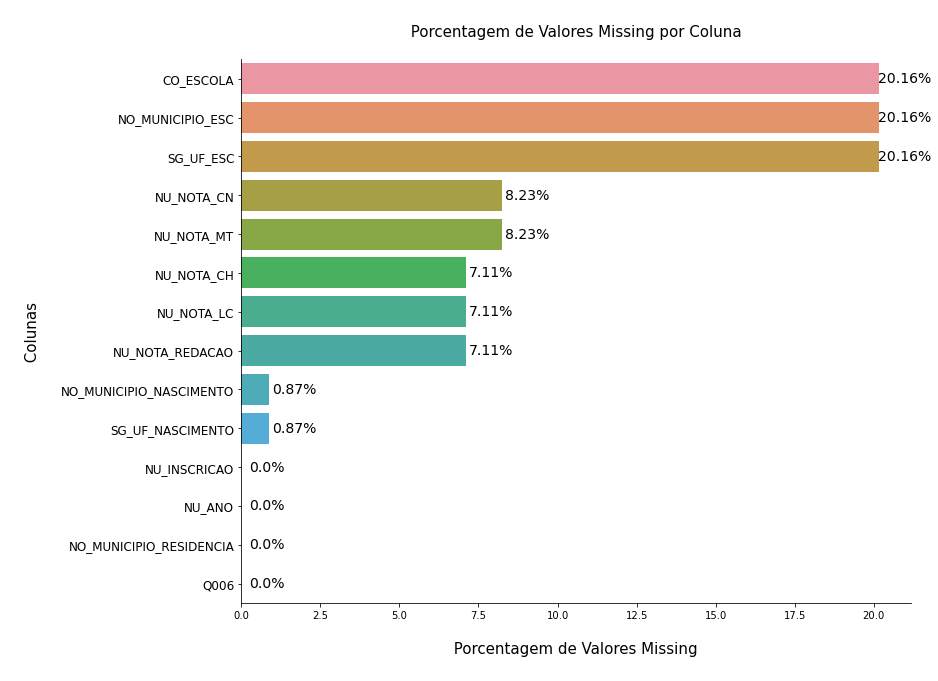

In [16]:
p1, ax1 = plt.subplots(figsize=(12, 10))
ax1 = sns.barplot(x=df_valores_missing['%_NA'], y=df_valores_missing['VAR'], orient='h')
ax1.set_title('\n Porcentagem de Valores Missing por Coluna \n', fontdict={'fontsize':15})
ax1.set_ylabel('\n Colunas \n', fontdict={'fontsize':15})
ax1.set_xlabel('\n Porcentagem de Valores Missing \n', fontdict={'fontsize':15})
ax1.set_yticklabels(labels =df_valores_missing['VAR'], fontdict={'fontsize':12})
ax1.set_xlim()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plotando os rótulos de dados do gráfico
for p in ax1.patches:
    _x = p.get_x() + p.get_width() + 0.8
    _y = p.get_y() + p.get_height() -0.3
    value = str(p.get_width()) + '%'
    ax1.text(_x, _y, value, fontdict={'color':'black', 'fontsize':14},
              horizontalalignment='center')

In [17]:
p1.savefig('images/porcentagem_na_antes.png', dpi=400)

In [18]:
del(dados_enem)

###### Esta análise continua no arquivo "analise_enem_parte_2"